### ***``ANOVA, Post-hoc tests, Normality and Homogenity tests on India's Population & COVID-19 datasets``***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy
import statsmodels

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
state_dly_cases = pd.read_csv("Datasets/covid_19_india.csv")

In [4]:
state_dly_cases.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304
8485,8486,16/11/20,8:00 AM,West Bengal,-,-,394576,7661,431551


In [5]:
state_ws_test = pd.read_csv("Datasets/StatewiseTestingDetails.csv")

In [6]:
state_ws_test.tail()

,Date,State,TotalSamples,Negative,Positive
7307,2020-11-11,West Bengal,5047335.0,NaN,NaN
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN


In [7]:
state_ws_test.shape

(7312, 5)

In [8]:
india_pop = pd.read_csv("Datasets/population_india_census2011.csv.txt")

In [9]:
india_pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [10]:
india_pop.shape

(36, 8)

##### **Merging the State Population and State wise testing dataframes**

In [11]:
np.count_nonzero(state_ws_test['State'].unique())

35

In [12]:
np.count_nonzero(india_pop['State / Union Territory'].unique())

36

In [13]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique())

{'Lakshadweep', 'Telengana'}

In [14]:
np.sort(india_pop['State / Union Territory'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
np.sort(state_ws_test['State'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

##### **Here, I found out that ``State wise COVID testing dataset`` has no information about testing carried out in ``Lakshadweep``. And, ``Telangana`` spelling is incorrect in ``Indian Pop dataset``.**

In [16]:
india_pop['State / Union Territory'] = india_pop['State / Union Territory'].apply(lambda state: 'Telangana' if state == 'Telengana' else state)

In [17]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique()) 

{'Lakshadweep'}

In [18]:
pop_test_df = pd.merge(left=state_ws_test,right=india_pop,left_on='State',right_on='State / Union Territory',how='outer')

In [19]:
pop_test_df.shape

(7313, 13)

In [22]:
pop_test_df.tail()

,Date,State,TotalSamples,Negative,Positive,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7312,NaN,NaN,NaN,NaN,NaN,36,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946


##### **Getting rid of few features :: ``Sno`` as it is a dummy running sequence number and ``State`` as we already have ``State / Union Territory`` providing the same information.** 

In [23]:
pop_test_df.drop(labels=['Sno','State'],axis=1,inplace=True)

##### **Renaming ``State / Union Territory`` as ``State``.**

In [26]:
pop_test_df.rename(columns={'State / Union Territory':'State'},inplace=True)

In [48]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,2013.0


In [47]:
pop_test_df['Density in km2'] = pop_test_df['Density'].apply(lambda row : np.float(row.split('/')[0].replace(",",'')))

In [49]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,2013.0


In [64]:
state_density_df = pop_test_df.groupby(['State'])[['Density in km2']].max().reset_index()

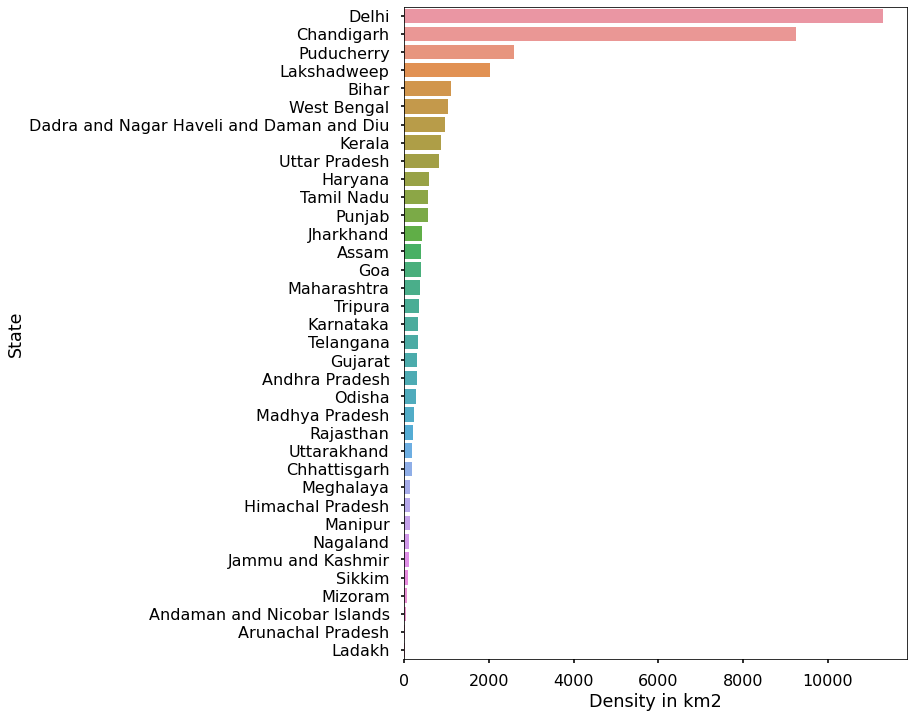

In [77]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(9,12))
    sns.barplot(data=state_density_df.sort_values(by='Density in km2',ascending=False),y='State',x='Density in km2',orient='h');

##### **``'Delhi'`` and ``'Chandigarh'`` totally stands out in this plot with the highest densities values.**

In [82]:
def dense_groups(density=0):
    """
    Description: This function defines the density group based on the state's density value.
    Input: It accepts only one parameter -- density (by default its 0)
    Return: Returns the density group name.
    """
    try:
        if 0<density<=300:
            grp_name = 'Dense1'
        elif 300<density<=600:
            grp_name = 'Dense2' 
        elif 600<density<=900:
            grp_name = 'Dense3'
        elif 900<density<=1200:
            grp_name = 'Dense4'
        else:
            grp_name = 'Dense5'
    except ValueError as err:
        pass
    return grp_name

In [89]:
pop_test_df['Dense_grp'] = list(map(dense_groups,pop_test_df['Density in km2']))

In [90]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [120]:
state_ws_nulls_in_pos = pop_test_df[pop_test_df['Positive'].isna()].groupby(['State'])[['State']].count().rename(columns={'State':'Nulls_in_pos'}).reset_index()

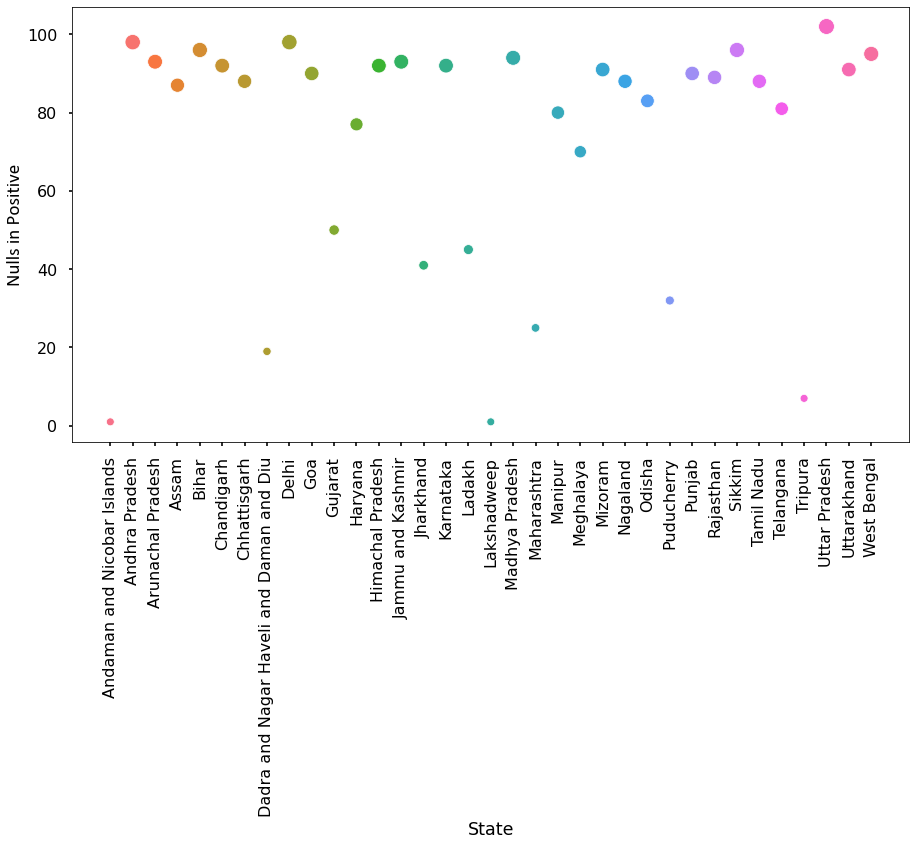

In [184]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=state_ws_nulls_in_pos,x='State',y='Nulls_in_pos',size=((state_ws_nulls_in_pos['Nulls_in_pos']*.1)**2),hue='State',legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Nulls in Positive", fontdict={'size':19,'family':'calibri','style':'normal'})

##### **Here, we came to know that majority of the states have same number of NULLS in the positive cases.**

In [185]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [284]:
def font_dicts(kind=['xlabel','ylabel','title']):
    """
    Description: This function is created for defining the font dictionaries of labels and titles for plots.
    
    Input parameters: It accepts only one below agrument:
            1. kind : Can take one of values --> ['xlabel','ylabel','title']
    
    Retuns: fdict with values of 'size', 'family' and 'color'
    """
    try:
        if kind == 'xlabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'blue'}
        elif kind == 'ylabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
        elif kind == 'title':
            fdict = {'size':17,'family':'calibri','style':'oblique','color':'brown'}
        else:
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
    except ValueError as err:
        pass
    return fdict

In [349]:
def plot_hist_kde(d_frame,grp_by_col,dist_col,title=None):
    """
    Description: This function plot the distribution of data
    
    Input Parameters: It accepts below arguments:
            1. d_frame : Dataset of type pandas dataframe
            2. grp_by_col : Column for grouping the data of several states
            3. dist_col : Column whose data distribution to be visualized
            4. title : Title of the plot
    
    Return: None
    """
    all_states = d_frame[grp_by_col].unique()
    with plt.style.context('seaborn-poster'):
        for state in all_states:
            plt.figure(figsize=(8,5))
            d_frame[d_frame[grp_by_col] == state][dist_col].plot(kind='hist',density=True,color='lightblue')
            sns.kdeplot(data=d_frame[d_frame[grp_by_col] == state][dist_col],color='coral',legend=False)
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].mean(),linestyle='--',color='purple')
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].median(),linestyle=':',color='black')
            plt.title(title,fontdict=font_dicts(kind='title'))
            plt.xlabel(state,fontdict=font_dicts(kind='xlabel'))
            plt.ylabel('Frequency',fontdict=font_dicts(kind='ylabel'))
            plt.xticks(size=13)
            plt.yticks(size=13)
            plt.legend(("Kde","Mean","Median"))

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


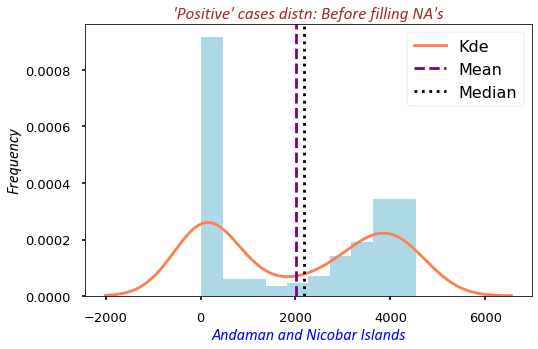

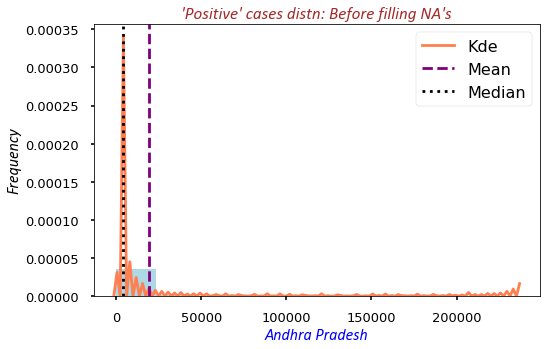

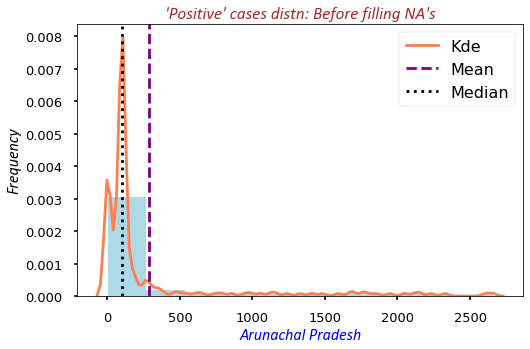

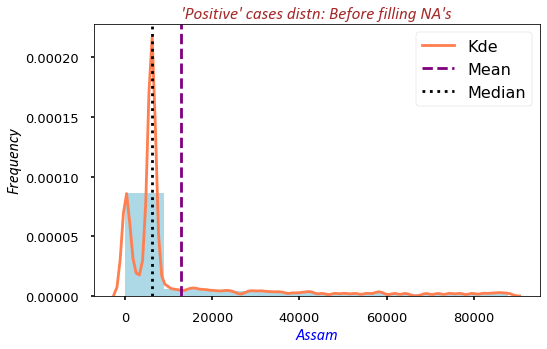

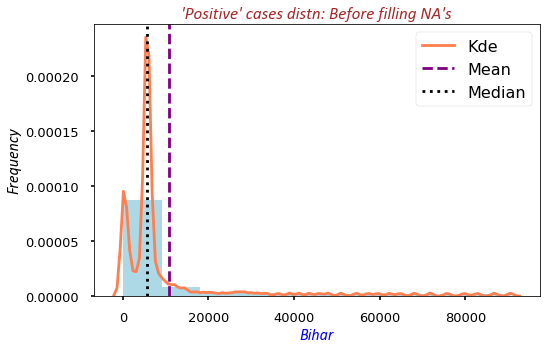

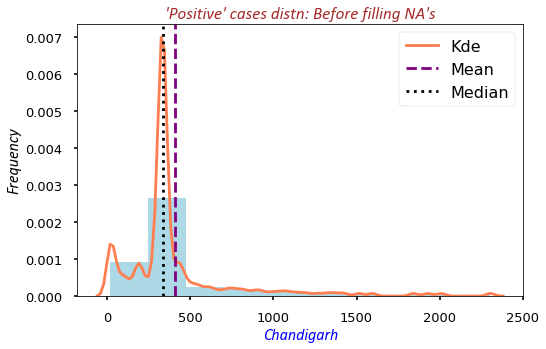

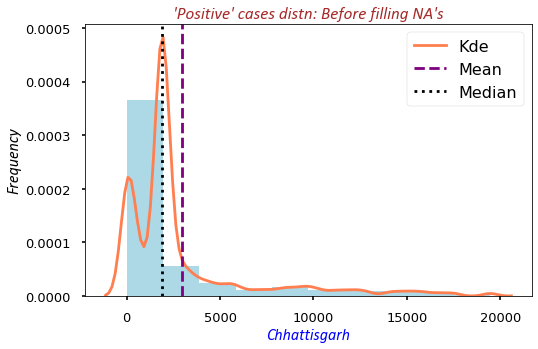

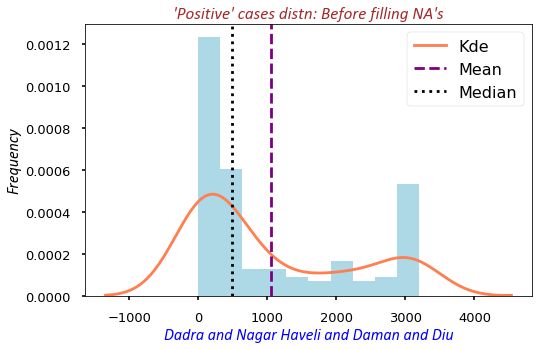

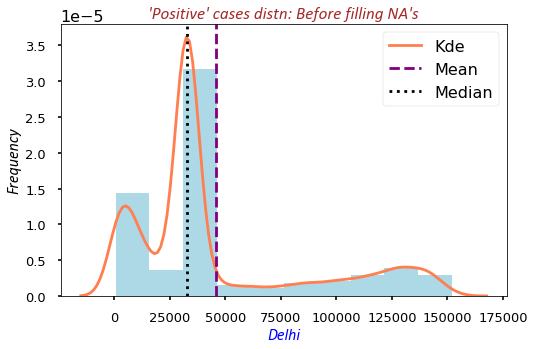

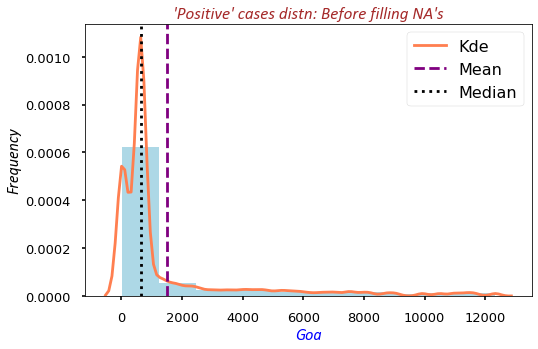

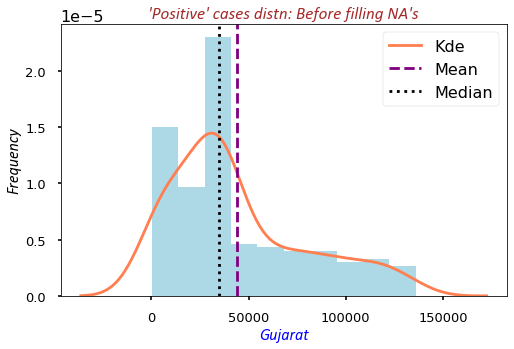

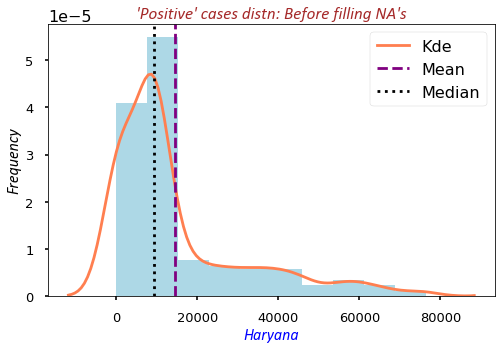

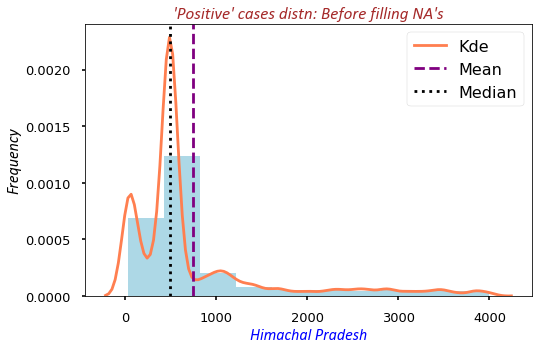

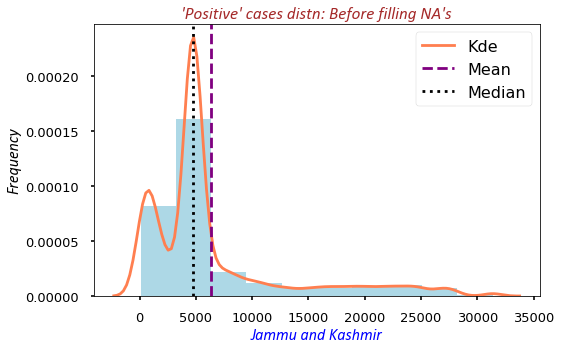

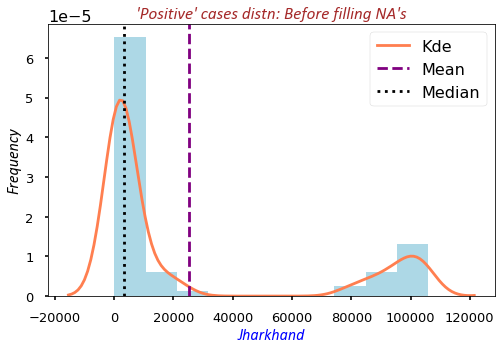

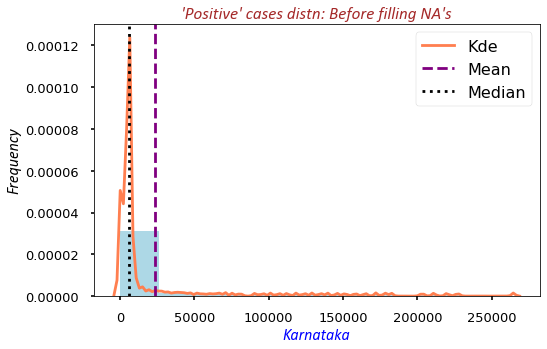

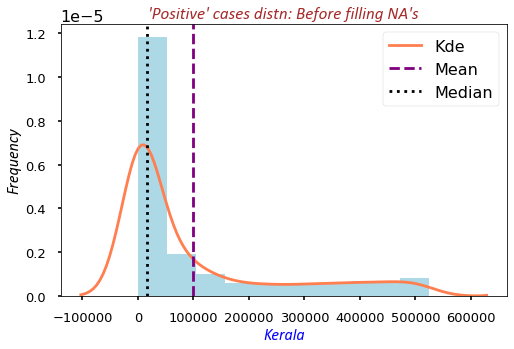

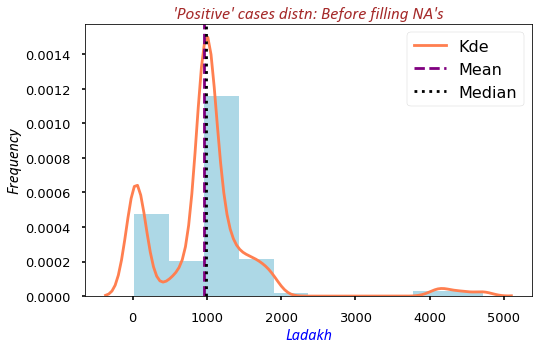

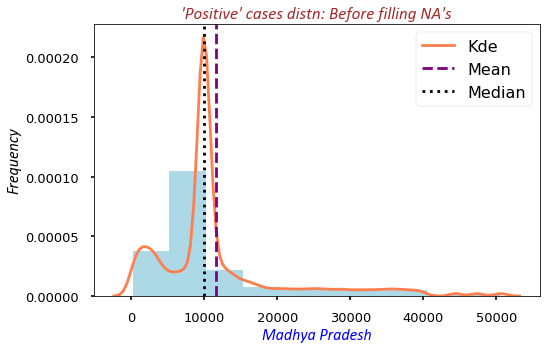

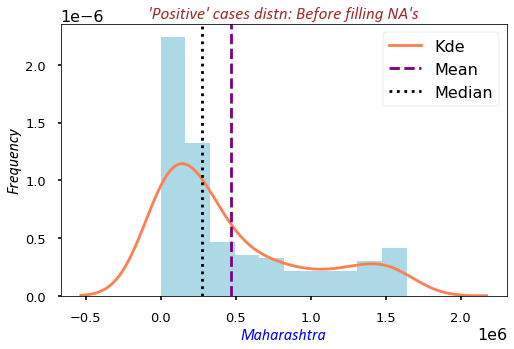

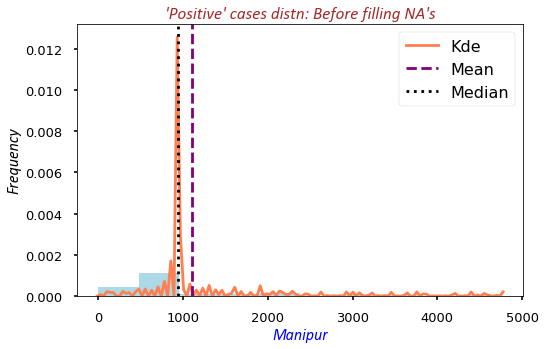

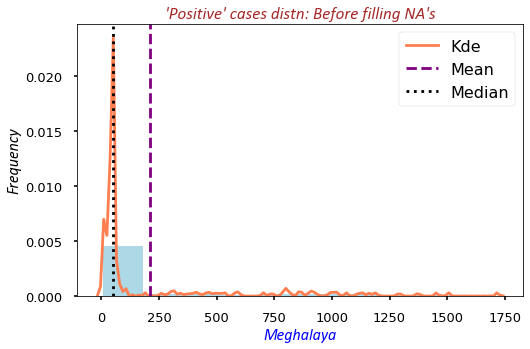

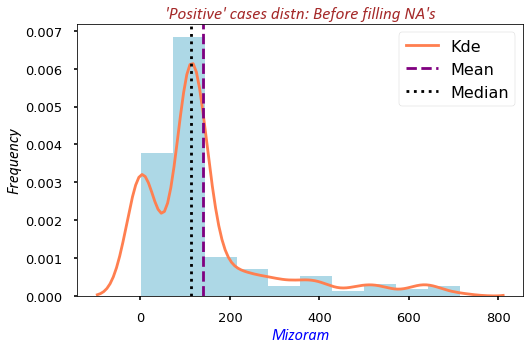

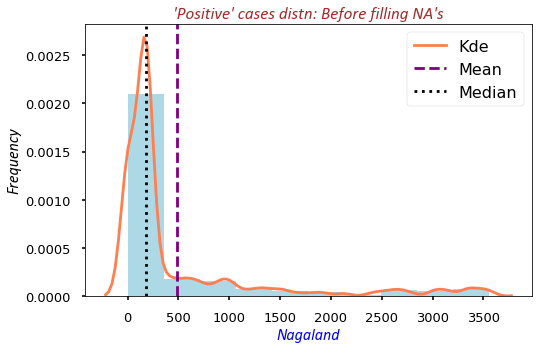

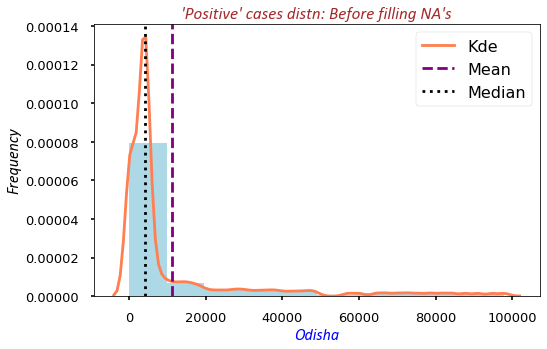

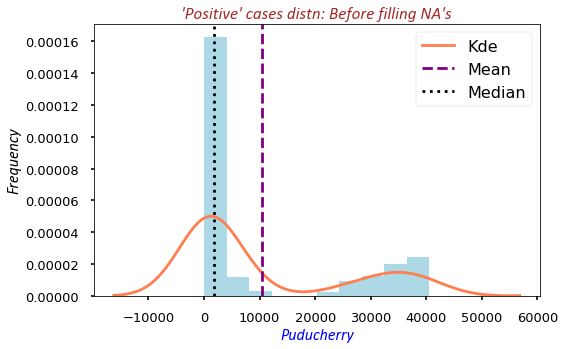

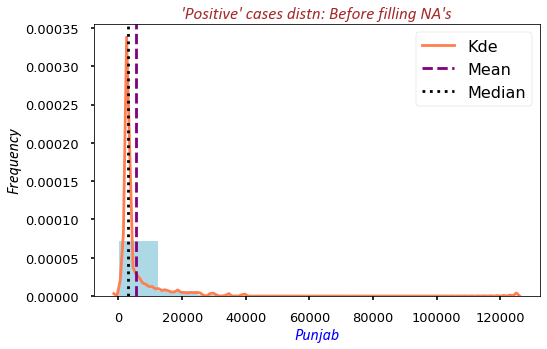

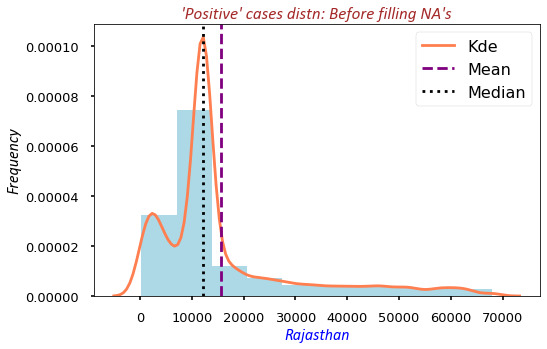

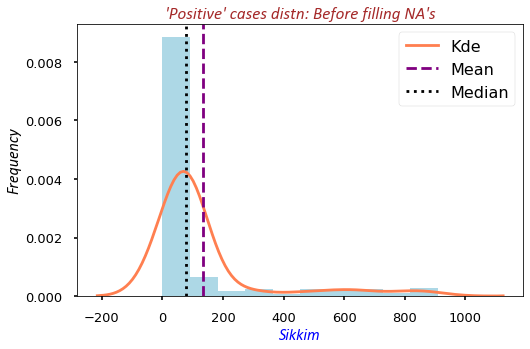

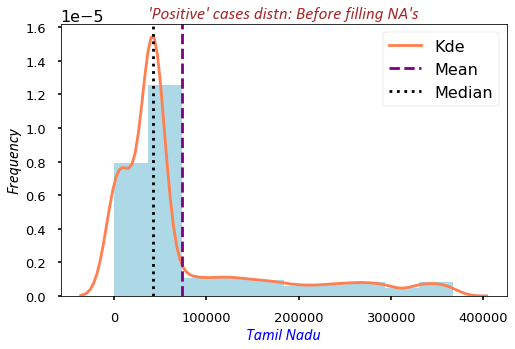

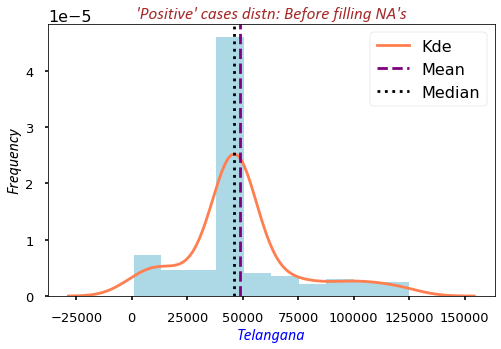

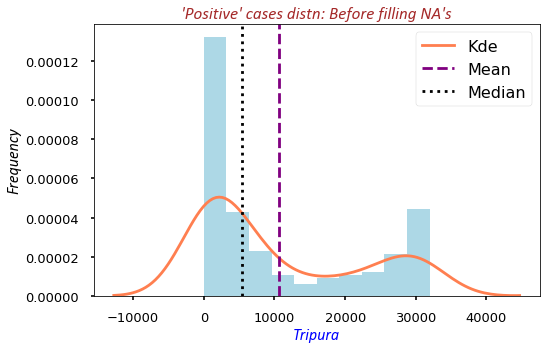

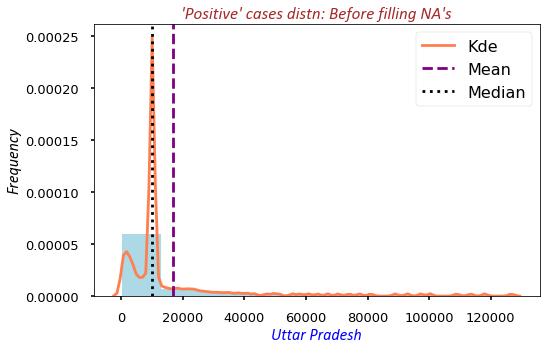

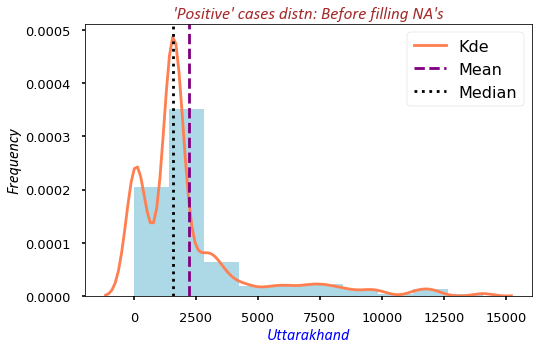

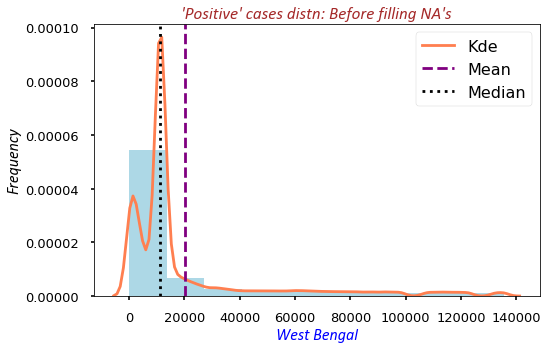

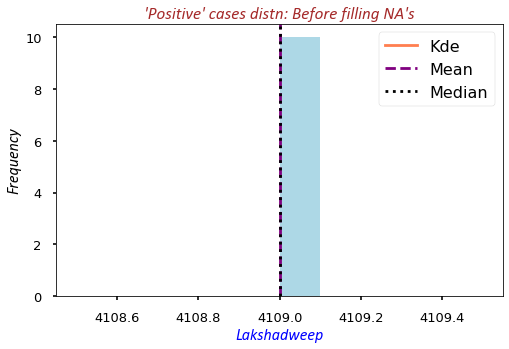

In [350]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' cases distn: Before filling NA's")

##### **Imputing NULL values in 'Positive' statewise**
- **``By seeing the above distributions it seems like Median would be more suitable for replacing the NULL values``**

In [305]:
states_pop_median = pop_test_df.groupby(['State'])[['Positive']].median().reset_index().rename(columns={'Positive':'Pos_Median'})

In [306]:
states_pop_median['Pos_Median'].fillna(value=states_pop_median['Pos_Median'].median(),inplace=True)

In [307]:
states_pop_median

,State,Pos_Median
0,Andaman and Nicobar Islands,2186.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0
5,Chandigarh,334.0
6,Chhattisgarh,1905.0
7,Dadra and Nagar Haveli and Daman and Diu,495.0
8,Delhi,32810.0
9,Goa,629.0


In [344]:
pop_test_df['Positive'] = pop_test_df[['State','Positive']].apply(lambda row: np.float(states_pop_median[states_pop_median['State'] == row['State']]['Pos_Median']) \
                                        if str(row['Positive']).lower() == str('NaN').lower() else row['Positive'],axis=1)

In [347]:
pop_test_df

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2020-11-12,5091700.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7309,2020-11-13,5136012.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7310,2020-11-14,5180139.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7311,2020-11-15,5218797.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


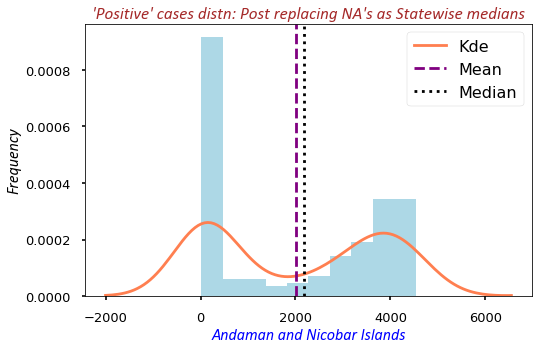

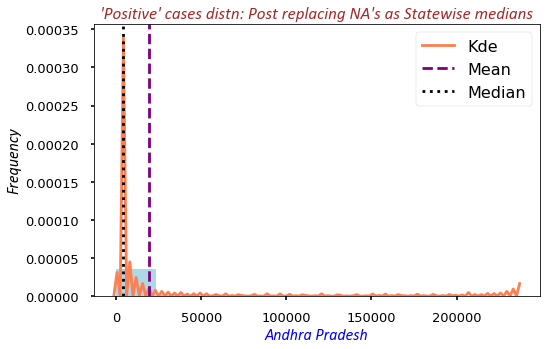

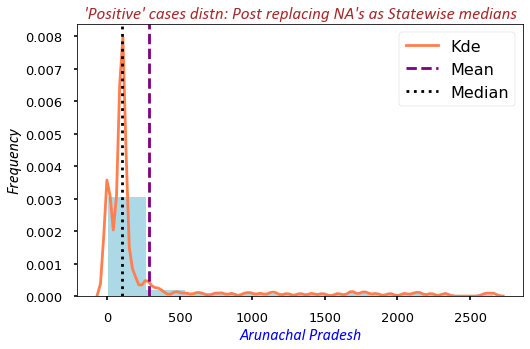

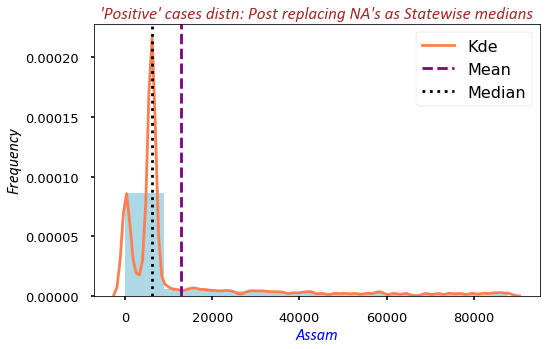

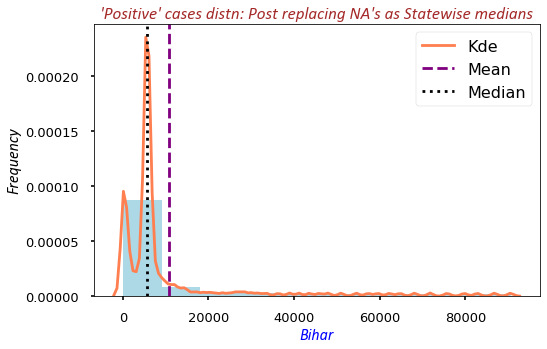

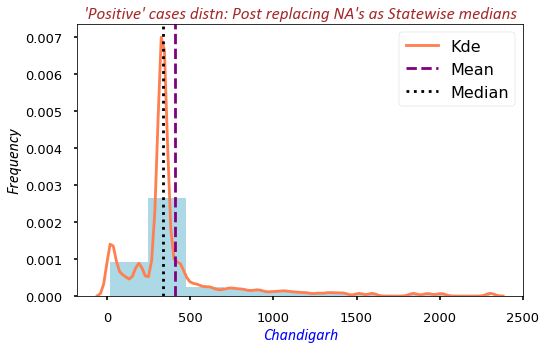

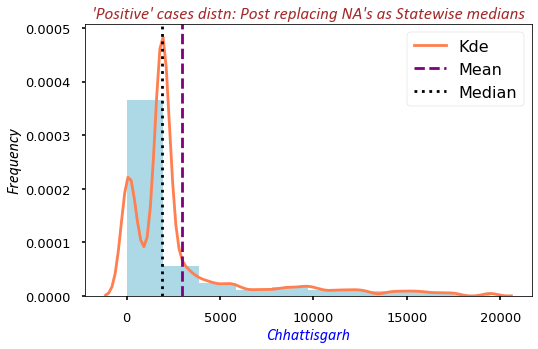

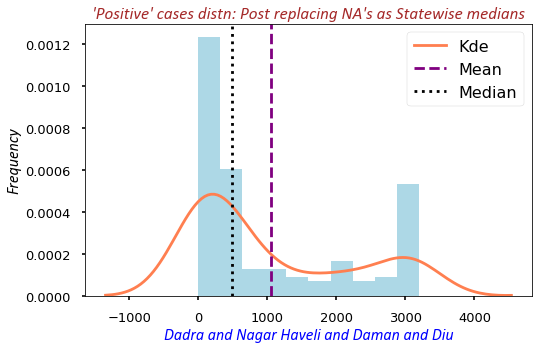

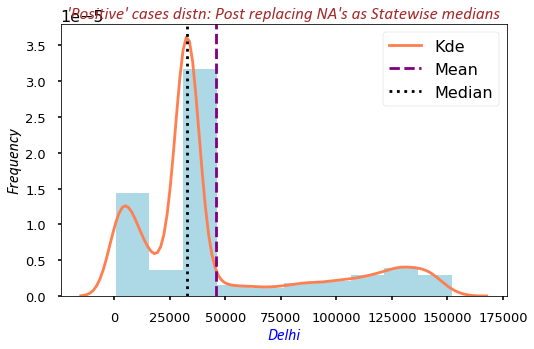

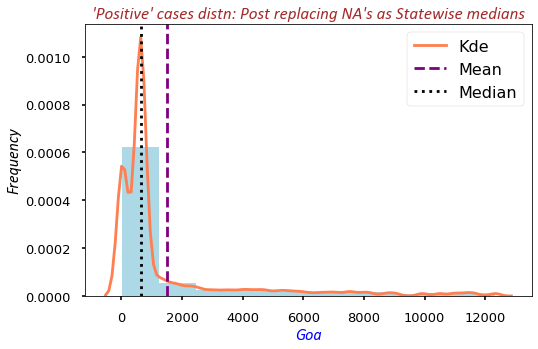

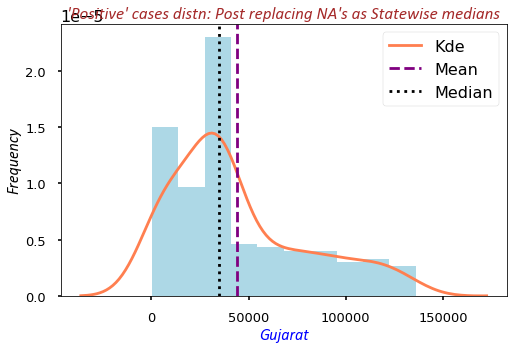

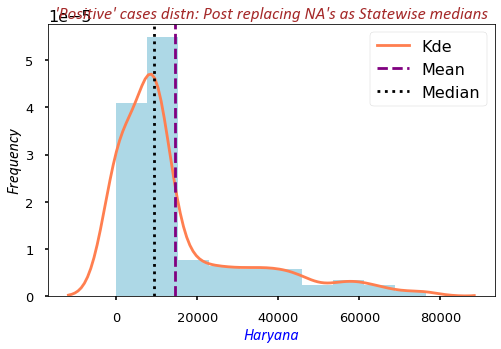

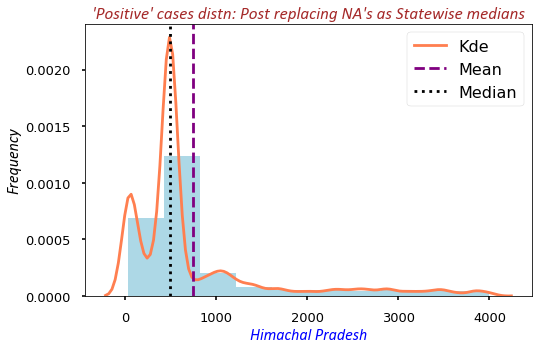

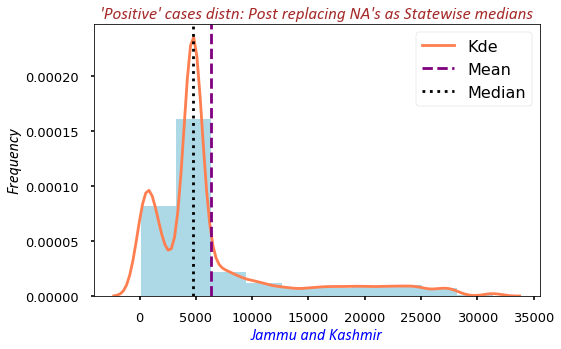

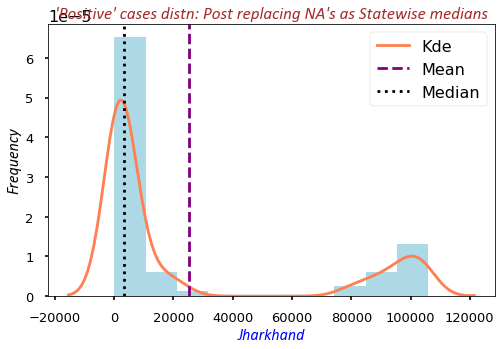

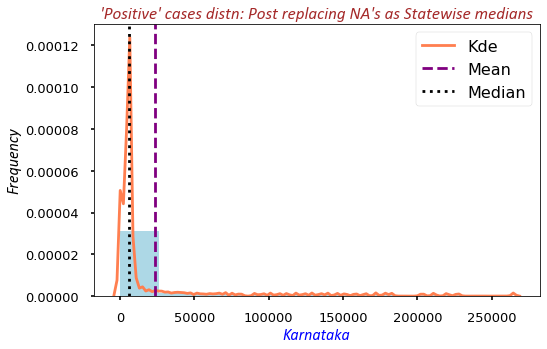

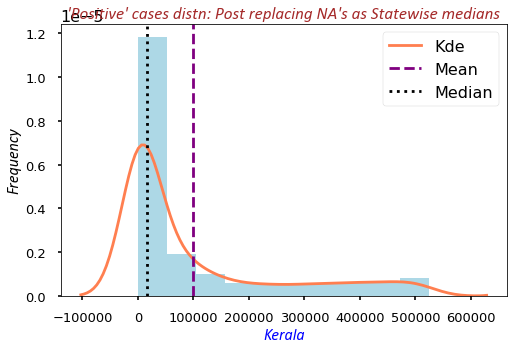

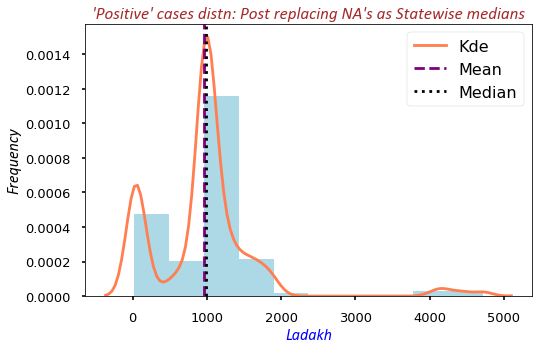

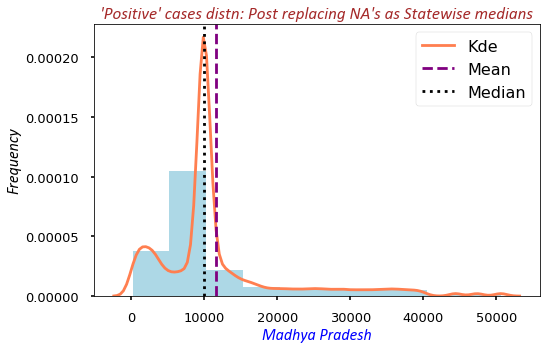

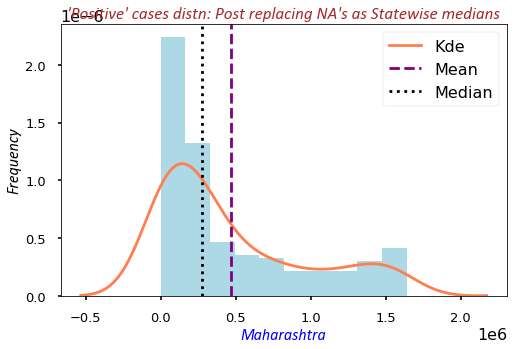

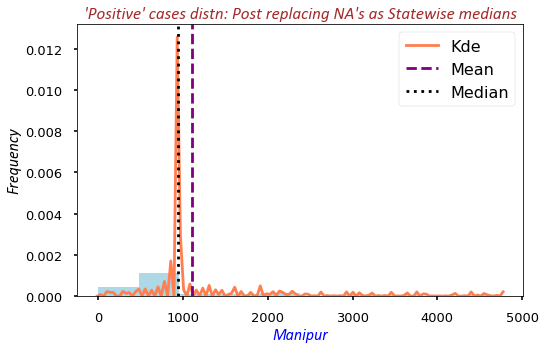

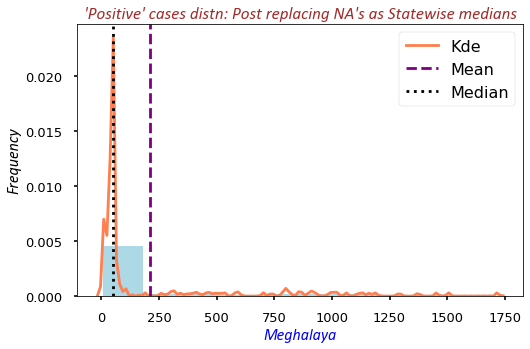

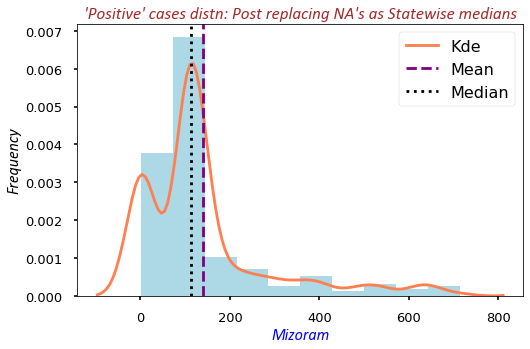

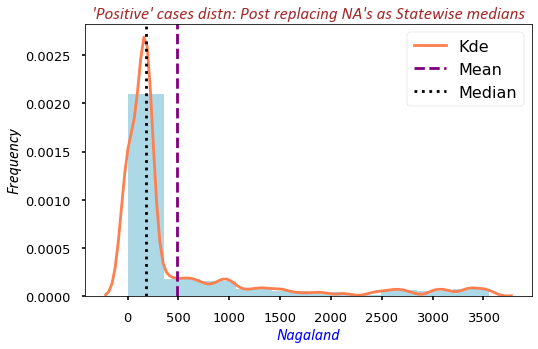

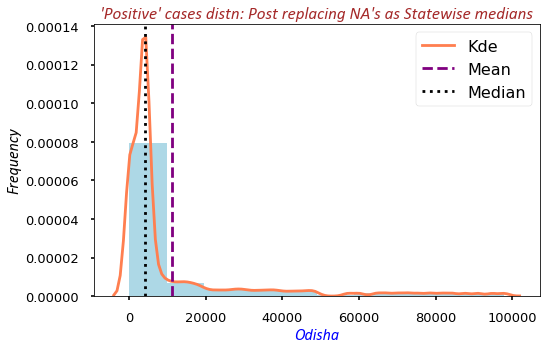

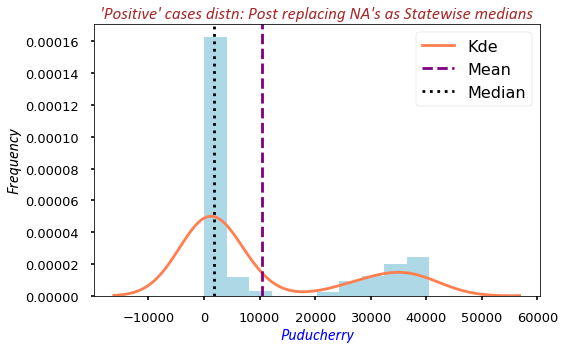

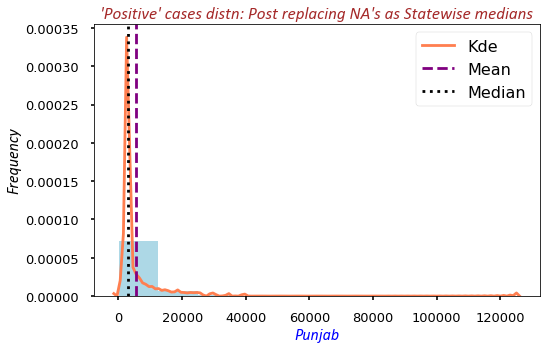

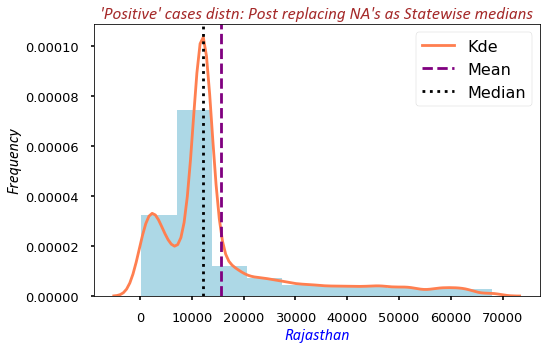

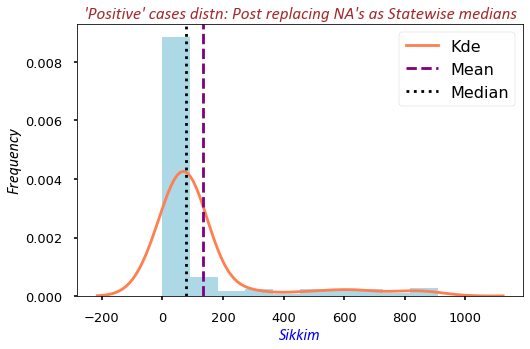

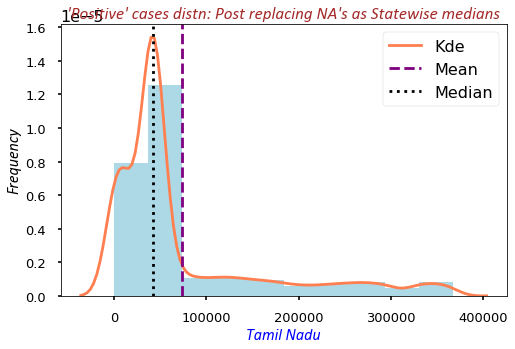

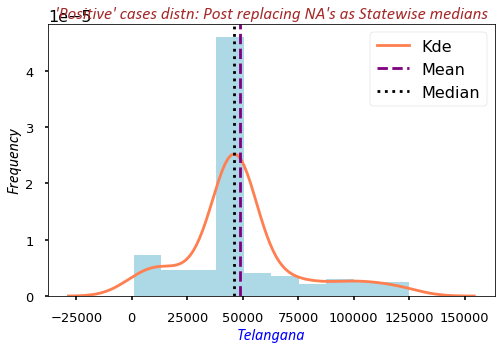

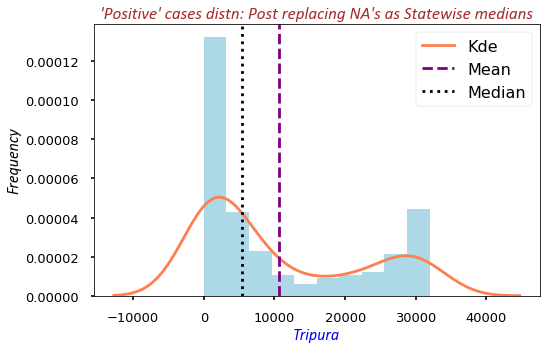

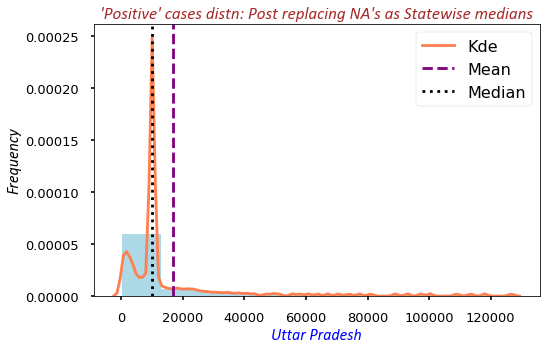

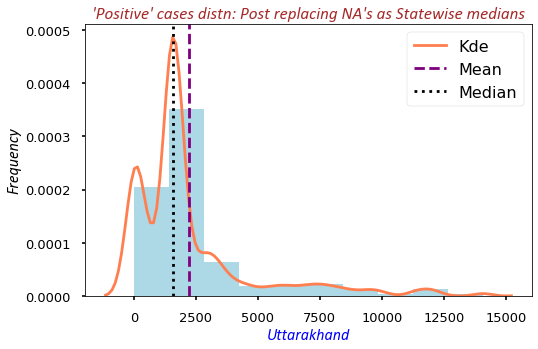

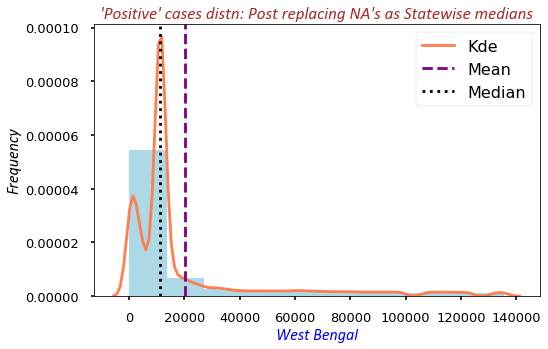

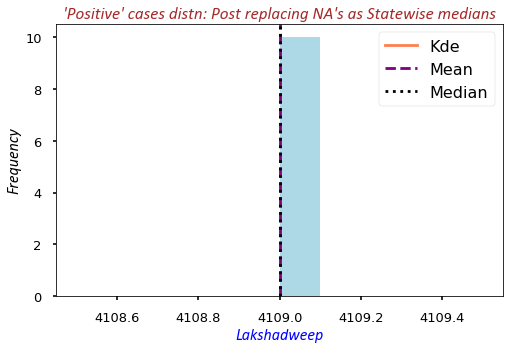

In [351]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' cases distn: Post replacing NA's as Statewise medians")

##### **Overall Distribution of ``Positive`` cases**

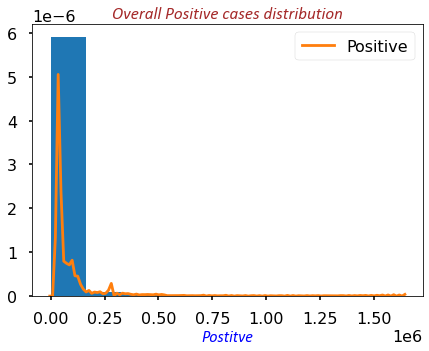

In [363]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(7,5))
    plt.hist(pop_test_df['Positive'],density=True)
    sns.kdeplot(data=pop_test_df['Positive'])
    plt.xlabel("Postitve",fontdict=font_dicts(kind='xlabel'))
    plt.title("Overall Positive cases distribution",fontdict=font_dicts(kind="title"));

##### **By seeing the above distribution, the first impression looks like 'Positive' follows the Power-Rule thus apply the PowerTransformer.** 

In [353]:
from sklearn.preprocessing import PowerTransformer

In [382]:
pt = PowerTransformer(method='yeo-johnson')

##### **Here, in the power transformer I have selected the method as ``'yeo-johnson'`` because ``'box-cox'`` strictly deals with positive values and it looks for the minimum value in the array should be grater than 0. However, in the ``'Positive'`` array the minimum value is 0, therefore going ahead with ``'yeo-johnson'``.**

##### **Checking the sign of values (-1 for negative, 1 for positive and 0 for 0)**

In [404]:
aa = pd.DataFrame(np.sign(pop_test_df['Positive']))
aa[aa.Positive==0]

,Positive
1472,0.0
1473,0.0
1474,0.0
1475,0.0
1476,0.0
...,...
5883,0.0
5884,0.0
5885,0.0
5886,0.0


##### **Minimum value in the array after ignoring NAN's**

In [376]:
np.nanmin(pop_test_df['Positive'])

0.0

##### **Applying the Power-Transformer**

In [400]:
positive_pt = pd.DataFrame(pt.fit_transform(pop_test_df[['Positive']]),columns=['PT_POS'])

In [401]:
positive_pt

,PT_POS
0,-1.755502
1,-1.537141
2,-1.480257
3,-1.480257
4,-1.480257
...,...
7308,0.569913
7309,0.569913
7310,0.569913
7311,0.569913


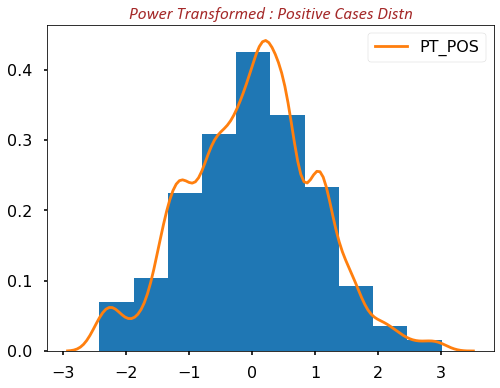

In [403]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,6))
    plt.hist(positive_pt['PT_POS'],density=True)
    sns.kdeplot(data=positive_pt['PT_POS'])
    plt.title("Power Transformed : Positive Cases Distn",fontdict=font_dicts(kind='title'))

##### **Here, it won't be a perfect Gaussian or Normal Bell Curve, however, we can say that it is normal curve upto some extent.**

In [409]:
scipy.stats.anderson(positive_pt['PT_POS'])

AndersonResult(statistic=7.474179600754724, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [99]:
grps_pos_cases = pd.DataFrame({'Dense1': pop_test_df[pop_test_df['Dense_grp'] == 'Dense1']['Positive'],
                               'Dense2': pop_test_df[pop_test_df['Dense_grp'] == 'Dense2']['Positive'],
                               'Dense3': pop_test_df[pop_test_df['Dense_grp'] == 'Dense3']['Positive'],
                               'Dense4': pop_test_df[pop_test_df['Dense_grp'] == 'Dense4']['Positive'],
                               'Dense5': pop_test_df[pop_test_df['Dense_grp'] == 'Dense5']['Positive']})

In [100]:
grps_pos_cases.describe()

,Dense1,Dense2,Dense3,Dense4,Dense5
count,1850.000000,1.722000e+03,350.000000,407.000000,429.000000
mean,4881.351892,8.328259e+04,73213.997143,13552.299754,21141.107226
std,10972.445620,2.346301e+05,128402.935317,25476.310357,37319.664745
min,0.000000,2.000000e+00,265.000000,0.000000,7.000000
25%,65.250000,1.527750e+03,1900.750000,377.000000,278.000000
50%,862.000000,1.001600e+04,12284.500000,2783.000000,1531.000000
75%,3856.750000,5.430425e+04,73927.250000,11884.500000,30140.000000
max,97920.000000,1.638961e+06,525000.000000,135596.000000,151928.000000


In [78]:
state_density_df.sort_values(by='Density in km2',ascending=True)

,State,Density in km2
17,Ladakh,2.8
2,Arunachal Pradesh,17.0
0,Andaman and Nicobar Islands,46.0
23,Mizoram,52.0
29,Sikkim,86.0
13,Jammu and Kashmir,98.0
24,Nagaland,119.0
21,Manipur,122.0
12,Himachal Pradesh,123.0
22,Meghalaya,132.0
